In [613]:
import math
import numpy as np
import pandas as pd
from scipy import stats as sts
from matplotlib import pyplot as ppl
%matplotlib inline

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Решение
Выбираем Гамма-распределение

https://en.wikipedia.org/wiki/Gamma_distribution

$f(x,\alpha)=\frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha \,-\, 1} e^{- \beta x }$

$F(x,\alpha)=\frac{1}{\Gamma(\alpha)} \gamma(\alpha,\, \beta x)$

математическое ожидание $\mu=\frac{\alpha}{\beta}$

дисперсия $\sigma^2=\frac{\alpha}{\beta^2}$

похоже, что scipy.stats.gamma() принимает только аргумент $\alpha$, полагая $\beta$ = 1


Математическое ожидание = 3.0 (3.0)
Дисперсия = 3.0 (3.0)


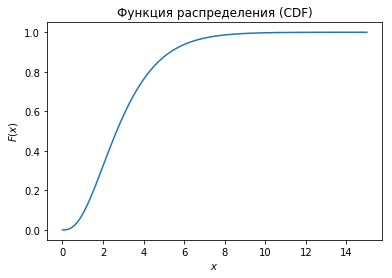

In [614]:
# Выбор распределения (Гамма-распределение) и генерация выборки объема 1000

alpha = 3
#beta = 1

rv_my = sts.gamma(alpha)

rvmean = alpha/1.0
rvdev = alpha/1.0**2

# проверка расчета матожидания и дисперсии по данным распределения
print 'Математическое ожидание =', rvmean, "(%s)" % rv_my.mean()
print 'Дисперсия =', rvdev, "(%s)" % rv_my.var()

# берем выборку чтобы нарисовать первые графики F(x,alpha), f(x,alpha)
rvs = rv_my.rvs(1000)

# Края выборки (справочно)
#print 'min:', rvs.min(), 'max:', rvs.max()

# Функция распределения 
x = np.linspace(0,15,100)
cdf = rv_my.cdf(x)
ppl.plot (x,cdf)
ppl.title(u'Функция распределения (CDF)')
ppl.ylabel('$F(x)$')
ppl.xlabel('$x$')
ppl.draw()



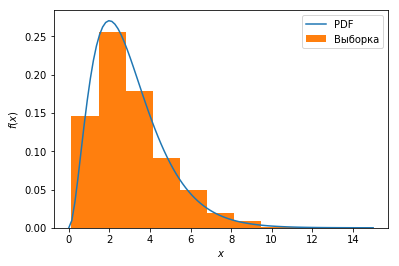

In [615]:
# Построение гистограммы выборки (normed = True), поверх — теоретическая плотность распределения

x = np.linspace(0,15,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label=u'PDF')

ppl.hist(rvs,normed=True,label=u'Выборка')

ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()



n = 5
m = 3.0 (по выборке 3.02763675919)
D = 0.6 (по выборке 0.621400743192)
sigma = 0.788289758396

n = 10
m = 3.0 (по выборке 2.97861126223)
D = 0.3 (по выборке 0.298877067403)
sigma = 0.546696503924

n = 50
m = 3.0 (по выборке 2.98426676697)
D = 0.06 (по выборке 0.0548232926077)
sigma = 0.234143743473



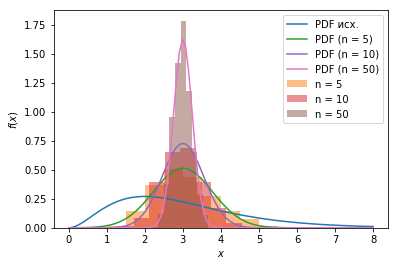

In [628]:
# Сначала изобразим всё на одном графике

ns = [5,10,50]
N = 1000

x = np.linspace(0,8,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label=u'PDF исх.')

for j in range(len(ns)):
    vs = np.array([rv_my.rvs(ns[j]) for i in range(N)])
    mids = np.zeros(N)
    for i in range(N):
        for z in vs[i]:
            mids[i] += z / ns[j]
     
    # для проверки оцениваем матожидание в выборке
    m = 0.0
    for z in range(N):
        m += mids[z] / N
        
    # для проверки оцениваем дисперсию в выборке
    D = 0.0
    for z in range(N):
        D += ((mids[z] - m) ** 2) / N
    sigma = np.sqrt(D)
    
    print 'n =', ns[j]
    print 'm =', rvmean, "(по выборке %s)" % m
    print 'D =', rvdev/float(ns[j]), "(по выборке %s)" % D
    print 'sigma =', sigma
    print 
    ppl.hist(mids,normed=True,label="n = %s" % ns[j],alpha=0.5)

    rv_norm = sts.norm(rvmean,np.sqrt(rvdev/float(ns[j])))
    pdf_norm = rv_norm.pdf(x)
    ppl.plot (x, pdf_norm, label="PDF (n = %s)" % ns[j])
    
ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()




n = 1
m = 3.0 (по выборке 3.10408996535)
D = 3.0 (по выборке 3.22928727391)
sigma = 1.79702177892



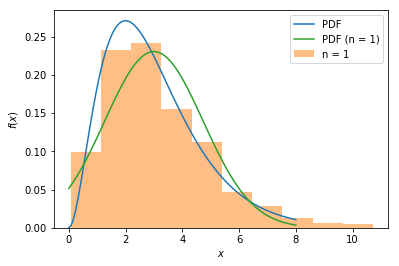

In [638]:
# Здесь отдельные графики. Можно задавать разные n

n = 1
N = 1000

x = np.linspace(0,8,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label='PDF')

vs = np.array([rv_my.rvs(n) for i in range(N)])
mids = np.zeros(N)
for i in range(N):
    for z in vs[i]:
        mids[i] += z / n

# для проверки оцениваем матожидание в выборке
m = 0.0
for z in range(N):
    m += mids[z] / N

# для проверки оцениваем дисперсию в выборке
D = 0.0
for z in range(N):
    D += ((mids[z] - m) ** 2) / N
sigma = np.sqrt(D)

print 'n =', n
print 'm =', rvmean, "(по выборке %s)" % m
print 'D =', rvdev/float(n), "(по выборке %s)" % D
print 'sigma =', sigma
print 
ppl.hist(mids,normed=True,label="n = %s" % n,alpha=0.5)

rv_norm = sts.norm(rvmean,np.sqrt(rvdev/float(n)))
pdf_norm = rv_norm.pdf(x)
ppl.plot (x, pdf_norm, label="PDF (n = %s)" % n)

ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()



n = 5
m = 3.0 (по выборке 2.95914563024)
D = 0.6 (по выборке 0.603297792026)
sigma = 0.776722467826



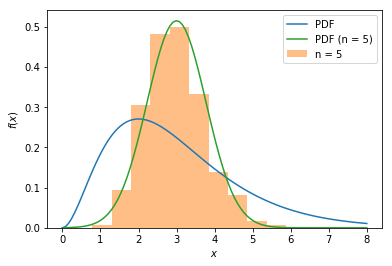

In [640]:
# Здесь отдельные графики. Можно задавать разные n

n = 5
N = 1000

x = np.linspace(0,8,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label='PDF')

vs = np.array([rv_my.rvs(n) for i in range(N)])
mids = np.zeros(N)
for i in range(N):
    for z in vs[i]:
        mids[i] += z / n

# для проверки оцениваем матожидание в выборке
m = 0.0
for z in range(N):
    m += mids[z] / N

# для проверки оцениваем дисперсию в выборке
D = 0.0
for z in range(N):
    D += ((mids[z] - m) ** 2) / N
sigma = np.sqrt(D)

print 'n =', n
print 'm =', rvmean, "(по выборке %s)" % m
print 'D =', rvdev/float(n), "(по выборке %s)" % D
print 'sigma =', sigma
print 
ppl.hist(mids,normed=True,label="n = %s" % n,alpha=0.5)

rv_norm = sts.norm(rvmean,np.sqrt(rvdev/float(n)))
pdf_norm = rv_norm.pdf(x)
ppl.plot (x, pdf_norm, label="PDF (n = %s)" % n)

ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()



n = 10
m = 3.0 (по выборке 3.00783527968)
D = 0.3 (по выборке 0.298493615496)
sigma = 0.546345692301



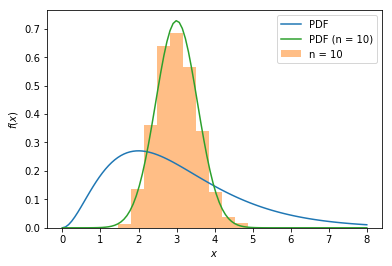

In [636]:
# Здесь отдельные графики. Можно задавать разные n

n = 10
N = 1000

x = np.linspace(0,8,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label='PDF')

vs = np.array([rv_my.rvs(n) for i in range(N)])
mids = np.zeros(N)
for i in range(N):
    for z in vs[i]:
        mids[i] += z / n

# для проверки оцениваем матожидание в выборке
m = 0.0
for z in range(N):
    m += mids[z] / N

# для проверки оцениваем дисперсию в выборке
D = 0.0
for z in range(N):
    D += ((mids[z] - m) ** 2) / N
sigma = np.sqrt(D)

print 'n =', n
print 'm =', rvmean, "(по выборке %s)" % m
print 'D =', rvdev/float(n), "(по выборке %s)" % D
print 'sigma =', sigma
print 
ppl.hist(mids,normed=True,label="n = %s" % n,alpha=0.5)

rv_norm = sts.norm(rvmean,np.sqrt(rvdev/float(n)))
pdf_norm = rv_norm.pdf(x)
ppl.plot (x, pdf_norm, label="PDF (n = %s)" % n)

ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()



n = 50
m = 3.0 (по выборке 3.01006590857)
D = 0.06 (по выборке 0.0576169722079)
sigma = 0.240035356162



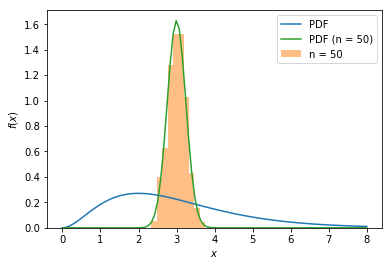

In [637]:
# Здесь отдельные графики. Можно задавать разные n

n = 50
N = 1000

x = np.linspace(0,8,100)
pdf = rv_my.pdf(x)
ppl.plot (x, pdf, label='PDF')

vs = np.array([rv_my.rvs(n) for i in range(N)])
mids = np.zeros(N)
for i in range(N):
    for z in vs[i]:
        mids[i] += z / n

# для проверки оцениваем матожидание в выборке
m = 0.0
for z in range(N):
    m += mids[z] / N

# для проверки оцениваем дисперсию в выборке
D = 0.0
for z in range(N):
    D += ((mids[z] - m) ** 2) / N
sigma = np.sqrt(D)

print 'n =', n
print 'm =', rvmean, "(по выборке %s)" % m
print 'D =', rvdev/float(n), "(по выборке %s)" % D
print 'sigma =', sigma
print 
ppl.hist(mids,normed=True,label="n = %s" % n,alpha=0.5)

rv_norm = sts.norm(rvmean,np.sqrt(rvdev/float(n)))
pdf_norm = rv_norm.pdf(x)
ppl.plot (x, pdf_norm, label="PDF (n = %s)" % n)

ppl.ylabel('$f(x)$')
ppl.xlabel('$x$')
ppl.legend()
ppl.draw()



## Выводы

При увеличении *n* точность аппроксимации *(гистограммой выборки по отношению к теоретическому нормальному распределению)* **возрастает**, дисперсия **снижается**